In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00


## Object detection with original model

### Image

In [3]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source="/content/drive/MyDrive/test_football/test2.jpg"

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 5.35M/5.35M [00:00<00:00, 125MB/s]
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/drive/MyDrive/test_football/test2.jpg: 384x640 17 persons, 51.5ms
Speed: 14.0ms preprocess, 51.5ms inference, 394.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [5]:
from IPython.display import display, Image

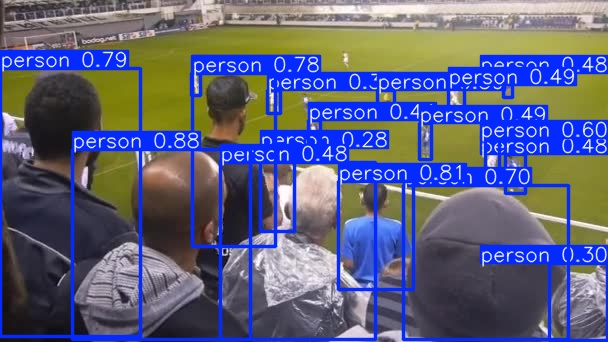

In [6]:
Image(filename='/content/runs/detect/predict/test2.jpg',height=600)

### Video

In [7]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source="/content/drive/MyDrive/test_football/2.mp4"

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

video 1/1 (frame 1/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 14 persons, 96.2ms
video 1/1 (frame 2/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 16 persons, 32.3ms
video 1/1 (frame 3/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 15 persons, 14.4ms
video 1/1 (frame 4/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 15 persons, 14.1ms
video 1/1 (frame 5/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 15 persons, 16.5ms
video 1/1 (frame 6/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 17 persons, 45.6ms
video 1/1 (frame 7/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 17 persons, 26.5ms
video 1/1 (frame 8/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 15 persons, 15.0ms
video 1/1 (frame 9/942) /content/drive/MyDrive/test_football/2.mp4: 384x6

Convert video avi format to mp4 and display on this notebook

In [8]:
from moviepy.editor import VideoFileClip
clip = VideoFileClip("/content/runs/detect/predict2/2.avi")
clip.write_videofile("/content/runs/detect/predict2/video.mp4", codec="libx264")

  if event.key is 'enter':



Moviepy - Building video /content/runs/detect/predict2/video.mp4.
Moviepy - Writing video /content/runs/detect/predict2/video.mp4



Moviepy - Done !
Moviepy - video ready /content/runs/detect/predict2/video.mp4


In [12]:
from IPython.display import Video
Video("video.mp4", embed=True, width=600, height=400)

# Train model with your custom dataset

In [9]:
# from google.colab import userdata
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="gebGIjtbZSkBfH1iQdge")
project = rf.workspace("industrial-university-of-ho-chi-minh-city-inppl").project("football-players-detection-3zvbc-awjwy")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-1 in yolov11:: 100%|██████████| 1412/1412 [00:00<00:00, 5991.46it/s]


In [11]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/football-players-detection-1/data.yaml epochs=100 imgsz=640 plots=True

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/football-players-detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

## Test trained model

## Image

In [13]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source="/content/drive/MyDrive/test_football/test2.jpg"

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/drive/MyDrive/test_football/test2.jpg: 384x640 12 players, 50.2ms
Speed: 5.0ms preprocess, 50.2ms inference, 176.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


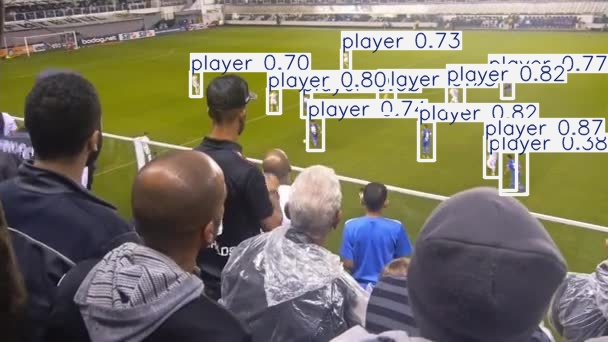

In [14]:
Image(filename='/content/runs/detect/predict3/test2.jpg',height=600)

## Video

In [15]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source="/content/drive/MyDrive/test_football/2.mp4"

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 33 players, 1 referee, 50.0ms
video 1/1 (frame 2/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 34 players, 1 referee, 14.9ms
video 1/1 (frame 3/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 32 players, 1 referee, 17.6ms
video 1/1 (frame 4/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 33 players, 1 referee, 16.3ms
video 1/1 (frame 5/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 32 players, 1 referee, 16.2ms
video 1/1 (frame 6/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 32 players, 1 referee, 15.0ms
video 1/1 (frame 7/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 30 players, 1 referee, 14.8ms
video 1/1 (frame 8/942) /content/drive/MyDrive/test_football/2.mp4: 384x640 30 players, 1 r

In [16]:
!zip -r yolo-football.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict3/ (stored 0%)
  adding: content/runs/detect/predict3/test2.jpg (deflated 4%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 30%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 5%)
  adding: content/runs/detect/train/F1_curve.png (deflated 8%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 5%)
  adding: content/runs/detect/train/PR_curve.png (deflated 11%)
  adding: content/runs/detect/train/train_batch2791.jpg (deflated 7%)
  adding: content/runs/detect/train/train_batch2790.jpg (deflated 4%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 28%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 5%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 2%)
  adding: content/runs/detect/train/events.out.tfevents.1743765

In [17]:
!cp yolo-football.zip /content/drive/MyDrive/